<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 集群 (Clusering) → 非監督式學習(unsupervised learning)
沒有哪一種區分方式是一定正確的，  
區分方式端看是否符合區分者的**需求**而定。

# 模型
每個都是d維空間的一個向量，  
世個資料點分配到人個集群中,方法非常 之多,這也就表示要找出最佳化的集 是一個非常国離的問題,我們經常會採用一種送代演算法,它通常可以得出相然不 群是 :

1. 一開始先從維空即中選出k個資料點,做為集群的大平均值(k-means).
2. 把其餘的部個資料點,分配給距離最近的平均值。
3. 如果資科點的分配結集已裡不再變動,就停止下來,並以目前分配的集非故乡作奖 4.如果分配结果仍在變動,就重新計算平均值,然後回到步。2.

只要運用「第4章:線性代數」的 Vector_mean 函式,建立一個物件類別來進行這項工作 整件事就變得提孤單了,

In [11]:
from typing import List

Vector = List[float]

def num_differences(v1:Vector,v2:Vector)->int:
  assert len(v1) == len(v2)
  return len([x1 for x1,x2 in zip(v1,v2) if x1 != x2])

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

def vector_sum(vectors:List[Vector]) -> Vector:
  #先檢查vertors這個向量列表是否為空
  assert vectors,"列表中沒有向量!"

  #檢查vertors 向量列表內的所有向量都具有相同的維度
  num_elements=len(vectors[0])
  assert all(len(v)==num_elements for v in vectors),"向量維度不一致"

  #所有vectors[i]相加起來，是結果的第i個元素值
  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

def subtrate( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) #兩個向量必須有相同的維度

  return [ v_i-w_i for v_i,w_i in zip(v,w)]

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

In [12]:
assert num_differences([1,2,3],[2,1,3]) == 2

In [13]:
assert num_differences([1,2],[1,2]) == 0

### 建立函式：  
* 給定一堆向量以及各向量所對應的集群 → 計算各集群的平均值

In [14]:

def vector_mean(vectors:List[Vector])->Vector:
  n=len(vectors)
  return scalar_multiply(1/n,vector_sum(vectors))

def cluster_means(k:int,inputs:List[Vector],assignments:List[int]) ->List[Vector]:

  # clusters[i] 包含的是分配給集群i的輸入資料點
  clusters = [[] for i in range(k)]

  for input,assignment in zip(inputs,assignments):
    clusters[assignment].append(input)
  
  # 如果集群是空的，就用一個隨機點來做為其代表
  return [vector_mean(cluster) if cluster else random.choice(inputs) for cluster in clusters]

### 集群處理的程式碼

In [15]:
import itertools
import random
import tqdm

def squared_distance(v:Vector,w:Vector) -> float:
  return sum_of_squares(subtrate(v,w))

In [23]:
class KMeans:
  def __init__(self,k:int)->None:
    self.k = k
    self.means = None
  
  def classify(self,input:Vector)->int:
    """送回最接近輸入的集群索引值"""
    return min(range(self.k),key=lambda i:squared_distance(input,self.means[i]))
  
  def train(self,inputs:List[Vector])->None:
    # 一開始先以隨機的方式，把輸入分配到各個集群中
    assignments = [random.randrange(self.k) for _ in inputs]

    with tqdm.tqdm(itertools.count()) as t:
      for _ in t:
        # 計算平均值並找出新的集群分配結果
        self.means = cluster_means(self.k,inputs,assignments)
        new_assigments = [self.classify(input) for input in inputs]

        # 檢查有幾個分配結果出現變化，並判斷是否已經完成
        num_changed = num_differences(assignments,new_assigments)
        if num_changed == 0:
          return
        
        # 如果尚未完成，就繼續重新分配集群，並計算新的平均值
        assignments = new_assigments
        self.means = cluster_means(self.k,inputs,assignments)
        t.set_description(f"change:{num_changed} / {len(inputs)}")

# 範例：聚會

### 圖 20-1 你家鄉使用者的所在位置分布
根據不同的觀察角度，可以看出有兩、三個集群。

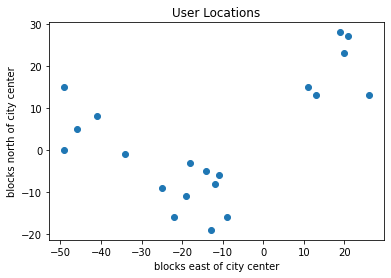

In [20]:
from matplotlib import pyplot as plt

inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

xs = [row[0] for row in inputs]
ys = [row[1] for row in inputs]

plt.scatter(xs,ys)
plt.title("User Locations")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

進行測試

In [25]:
random.seed(12)
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 3

change:5 / 20: : 0it [00:00, ?it/s]


檢查平均值是否接近我們的預期

In [26]:
assert squared_distance(means[0],[-44,5]) < 1
assert squared_distance(means[1],[-16,-10]) < 1
assert squared_distance(means[2],[18,20]) < 1

### 圖 20-2 使用者所在的位置，被分成三個集群

In [28]:
from matplotlib import pyplot as plt

inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

xs = [row[0] for row in inputs]
ys = [row[1] for row in inputs]

for i, cluster, marker, color in zip([1, 2, 3],three_clusters,['D','o','*'],['r','g','b']):
  xs, ys = zip(*cluster)  # magic unzipping trick
  plt.scatter(xs, ys, color=color, marker=marker)
  
  # put a number at the mean of the cluster
  x, y = vector_mean(cluster)
  plt.plot(x, y, marker='$' + str(i) + '$', color='black')
  

# plt.show()
    
plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

NameError: ignored

### 圖 20-3 使用者所在的位置，被分成兩個集群